# Module 7 Assignment 3: Digit Recognizer

**Reed Ballesteros**

**MSDS-422**

**5/15/2022**

**Instructor: Prof. Noah Gift**

# Digit Recognizer (https://www.kaggle.com/c/digit-recognizer) 

### Background Materials
This week, you will compete in the classic MNIST Digit Recognizer (Links to an external site.) competition using neural networks.

### Management/Research Question
In layman’s terms, what is the management/research question of interest, and why would anyone care?  

### Requirements
- Conduct your analysis using a cross-validation design.
- Conduct / refine EDA.
- Conduct Design of Experiments to evaluate the performance of various neural networks by changing the layers and nodes. Tested neural network structures should be explored within a benchmark experiment, a 2x2 completely crossed design. An example of a completely crossed designed with {2, 5} layers and {10,20} nodes follows.

Layers| Nodes| Time| Training Accuracy| Testing Accuracy
---|---|---|---|---
2| 10| 63.61| 0.935| 0.927
2| 20| 115.25| 0.967| 0.952
5| 10| 74.28| 0.944| 0.933
5| 20| 75.1| 0.964| 0.952

-  Due to the time required to fit each neural network, we will observe only one trial for each cell in the design. 
- You will build your models on csv and submit your forecasts for test.csv to Kaggle.com, providing your name and user ID for each experimental trial. 
- Evaluate goodness of fit metrics on the training and validation sets.
- Provide a multi-class confusion matrix.
- Discuss how your models performed.

In summary, this assignment asks you to fit a number of neural networks, comparing processing time and performance across experimental treatments. Processing time will be recorded for the fitting on the train.csv. Kaggle.com accuracy scores will be reported for all benchmarks.  

### Libraries to be loaded

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import shutil
import tensorflow as tf
from datetime import datetime
from matplotlib import pyplot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

## Ingest

In [2]:
train_df = pd.read_csv("train.csv")
train_df.shape

(42000, 785)

In [3]:
test_df = pd.read_csv("test.csv")
test_df.shape

(28000, 784)

## EDA

In [4]:
train_df_X = train_df.copy()
train_df_y = train_df_X['label']
train_df_X.drop(['label'], axis=1, inplace=True)


## MODELLING

Let's split train.csv 80/20 into training and validation datasets.

In [5]:
X_train,X_val,y_train,y_val=train_test_split(train_df_X,train_df_y,test_size=0.2,random_state=42)

### NEURAL NETWORK

In [172]:
shutil.rmtree('my_mnist_logs')
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [173]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

new_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
new_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["sparse_categorical_accuracy"]
            )
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1

In [174]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
                    verbose=1,patience=20)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("yo_model.h5",verbose=1,save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

history = new_model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1016/1050 [============================>.] - ETA: 0s - loss: 0.6348 - sparse_categorical_accuracy: 0.8561WARNING:tensorflow:Model was constructed with shape (None, 28, 28) for input Tensor("flatten_input:0", shape=(None, 28, 28), dtype=float32), but it was called on an input with incompatible shape (None, 784).

Epoch 00001: val_loss improved from inf to 0.30006, saving model to yo_model.h5
1050/1050 [==============================] - 2s 2ms/step - loss: 0.6220 - sparse_categorical_accuracy: 0.8585 - val_loss: 0.3001 - val_sparse_categorical_accuracy: 0.9136
Epoch 2/100
1021/1050 [============================>.] - ETA: 0s - loss: 0.2268 - sparse_categorical_accuracy: 0.9343
Epoch 00002: val_loss improved from 0.30006 to 0.21893, saving model to yo_model.h5
1050/1050 [==============================] - 2s 1ms/step - loss: 0.2269 - sparse_categorical_accuracy: 0.9343 - val_loss: 0.2189 - val_sparse_categorical_accuracy: 0.9360
Epoch 3/100
1050/1050 [===========================

Epoch 22/100
1020/1050 [============================>.] - ETA: 0s - loss: 0.0549 - sparse_categorical_accuracy: 0.9870
Epoch 00022: val_loss did not improve from 0.13382
1050/1050 [==============================] - 2s 1ms/step - loss: 0.0547 - sparse_categorical_accuracy: 0.9870 - val_loss: 0.1830 - val_sparse_categorical_accuracy: 0.9694
Epoch 23/100
1028/1050 [============================>.] - ETA: 0s - loss: 0.0319 - sparse_categorical_accuracy: 0.9912
Epoch 00023: val_loss did not improve from 0.13382
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0326 - sparse_categorical_accuracy: 0.9910 - val_loss: 0.2257 - val_sparse_categorical_accuracy: 0.9613
Epoch 24/100
1011/1050 [===========================>..] - ETA: 0s - loss: 0.0500 - sparse_categorical_accuracy: 0.9896
Epoch 00024: val_loss did not improve from 0.13382
1050/1050 [==============================] - 2s 1ms/step - loss: 0.0490 - sparse_categorical_accuracy: 0.9897 - val_loss: 0.1943 - val_sparse_catego

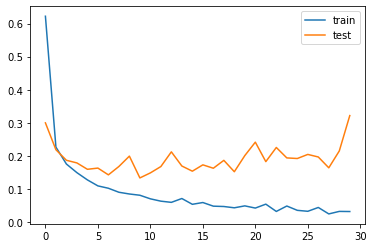

In [175]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [176]:
best_model = tf.keras.models.load_model("yo_model.h5") # rollback to best model
best_model.evaluate(X_val, y_val)

263/263 [==============================] - 0s 650us/step - loss: 0.1338 - sparse_categorical_accuracy: 0.9663


[0.1338234692811966, 0.9663095474243164]

In [177]:
best_model.evaluate(X_train, y_train)

1050/1050 [==============================] - 1s 912us/step - loss: 0.0457 - sparse_categorical_accuracy: 0.9873


[0.045716192573308945, 0.9873214364051819]

In [178]:
#%load_ext tensorboard
%reload_ext tensorboard


In [179]:
%tensorboard --logdir=./my_mnist_logs --port=6006


Reusing TensorBoard on port 6006 (pid 9584), started 0:04:53 ago. (Use '!kill 9584' to kill it.)

In [180]:
y_test = best_model.predict(test_df)
y = []
for i in range (0, len(y_test)):
    y.append(np.argmax(y_test[i]))

In [181]:
# create submission file
submission = pd.DataFrame({"ImageId": (test_df.index + 1),"Label": y})
submission.to_csv('submission.csv', index=False)